<a href="https://colab.research.google.com/github/sejalagrawal/selfdrivecar_1/blob/main/ClassifyRoadSymbols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [4]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
from random import randint


In [6]:
np.random.seed(0)


In [7]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

<class 'dict'>


In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [9]:
assert(X_train.shape[0]==y_train.shape[0]),"No of images is not equal to no of labels"
assert(X_val.shape[0]==y_val.shape[0]),"No of images is not equal to no of labels"
assert(X_test.shape[0]==y_test.shape[0]),"No of images is not equal to no of labels"
assert(X_train.shape[1:] == (32,32,3)),"Dimentions od images are not 32x32x3"
assert(X_val.shape[1:] == (32,32,3)),"Dimentions od images are not 32x32x3"
assert(X_test.shape[1:] == (32,32,3)),"Dimentions od images are not 32x32x3"

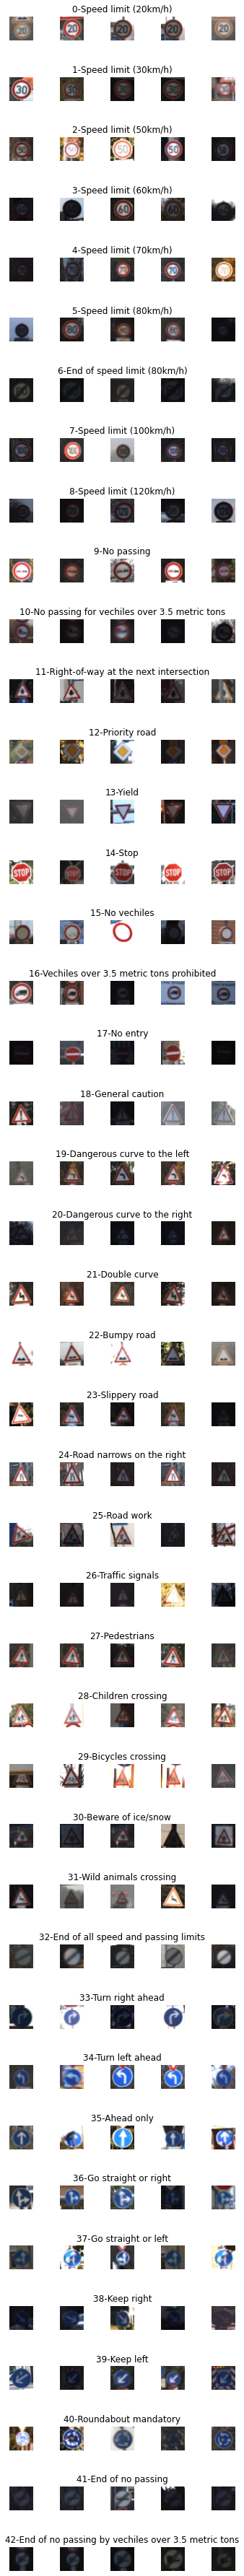

In [10]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
##print(data)
num_of_samples=[]
cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j,row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + "-" + row["SignName"])
      num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


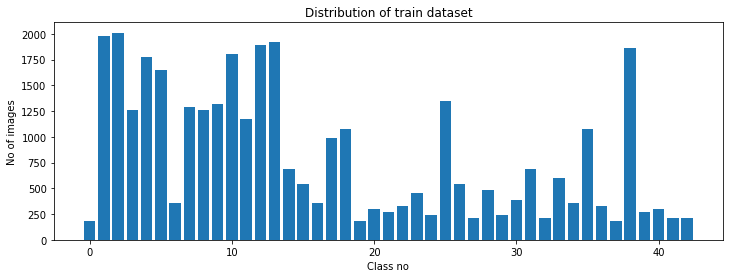

In [11]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of train dataset")
plt.xlabel("Class no")
plt.ylabel("No of images")
plt.show()

(32, 32, 3)
36


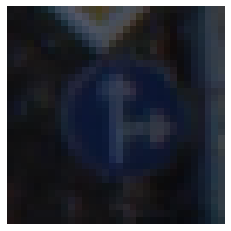

In [12]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


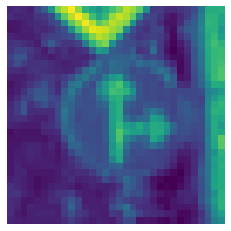

In [13]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img1 = grayscale(X_train[1000])
plt.imshow(img1)
plt.axis("off")
print(img1.shape)

(32, 32)


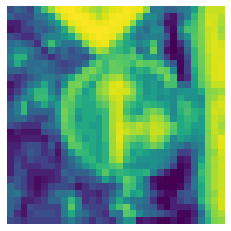

In [14]:
def equalize(img):
  img = cv2.equalizeHist(img)   # accepts only grayscale images, do not have depth
  return img

img = equalize(img1)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [15]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))


(34799, 32, 32)


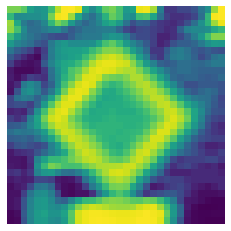

In [16]:
plt.imshow(X_train[random.randint(0, len(X_train - 1))])
plt.axis("off")
print(X_train.shape)

In [17]:
X_train = X_train.reshape(34799,32,32,1)
X_val = X_val.reshape(4410,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [18]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)